In [1]:
%load_ext autoreload
%autoreload 2

%load_ext dotenv
%dotenv ../.env.local

In [2]:
import base64
from anthropic import Anthropic

import os
from pathlib import Path
import json

from utils import build_message_list, parse_json_response

In [3]:
client = Anthropic(
    api_key=os.environ.get('ANTHROPIC_API_KEY'),
)

MODEL_NAME = "claude-3-opus-20240229"

def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

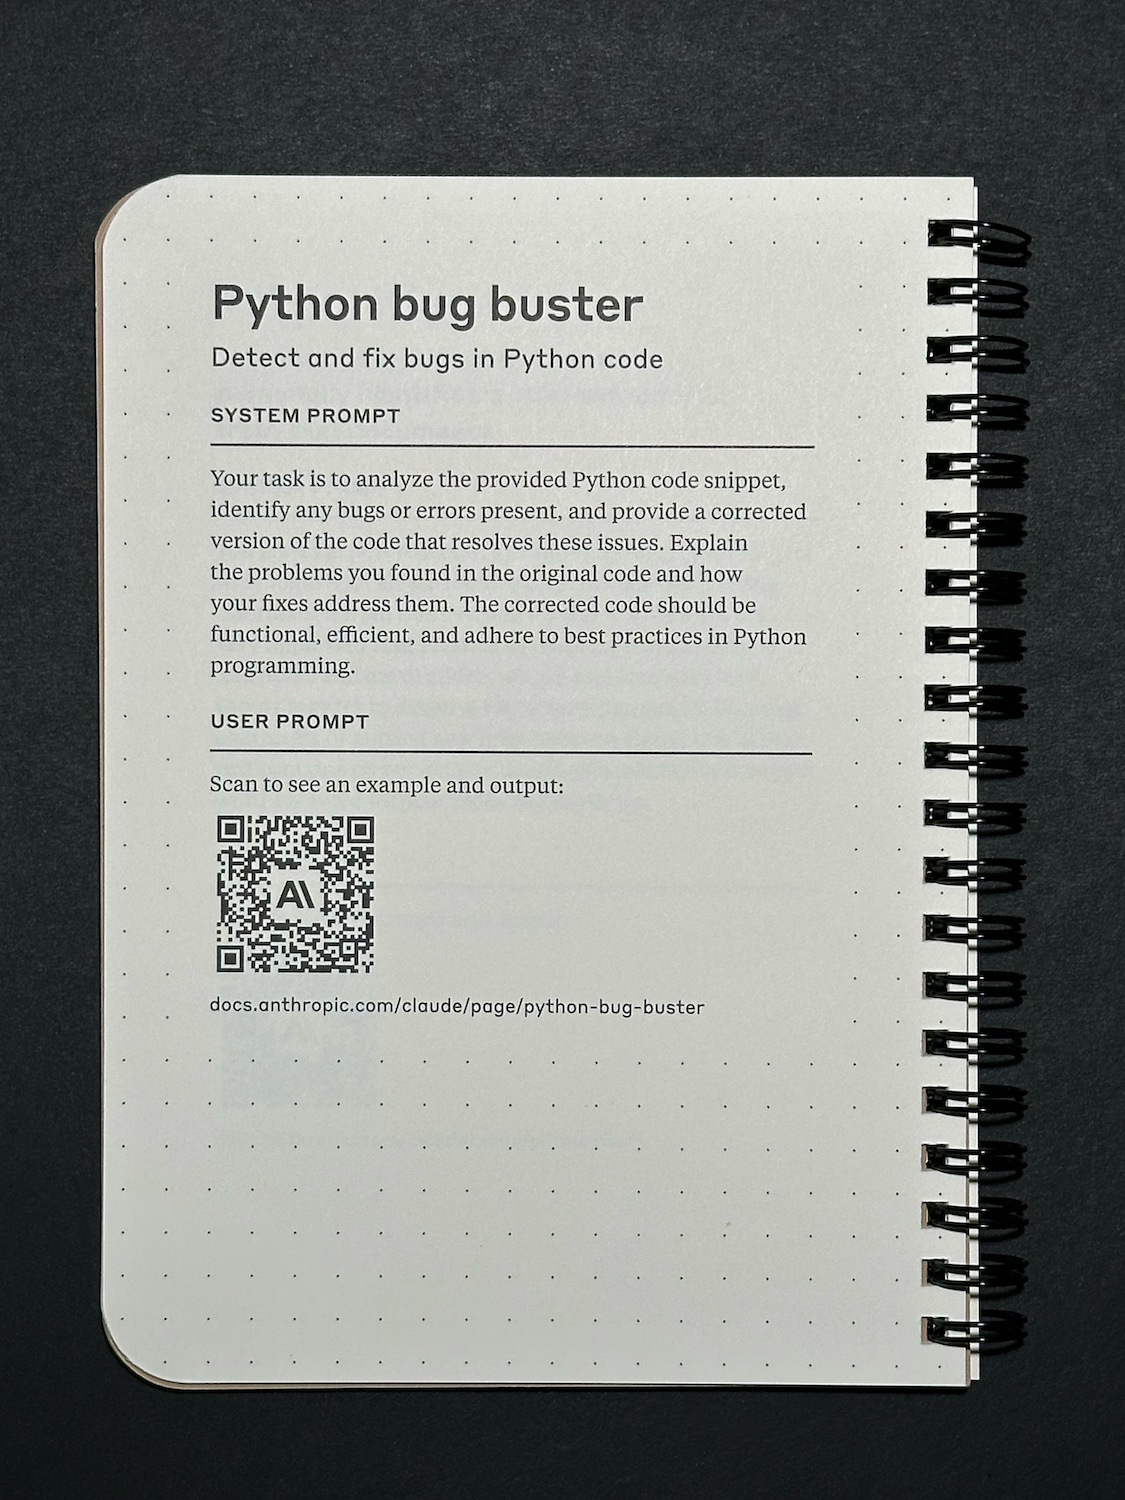

In [6]:
from IPython.display import Image

Image(filename='../data/printed.png') 

In [9]:
system_prompt = '''You are a AI engineer working on a prompt workflow. 
You have been tasked with creating a JSON Canvas diagram that shows the flow of prompts from a handwritten sketch.
All system prompts should connect to a user prompt.
All user prompts should connect to an assistant response.
If no assistant response is present, you should add one.
Ignore all other text on the page including the title and any other text that is not part of the diagram.

Here is an example of a JSON Canvas diagram that you should output in the response:

<canvas>
{
	"nodes":[
		{"type":"group","id":"161279baf7763214","x":-174,"y":-160,"width":394,"height":340,"label":"Cannoli"},
		{"type":"text","text":"Hello world!","id":"dc3f9351f787531e","x":-97,"y":-91,"width":250,"height":60},
		{"type":"text","text":"","id":"bc1a550bbb4aac7b","x":-97,"y":60,"width":250,"height":60,"color":"6"},
		{"type":"text","text":"The purple node is a content node. Content nodes can be used to store and display text that can be read or written by you or another node.","id":"f77169b141243e65","x":240,"y":30,"width":420,"height":120},
		{"type":"text","text":"The colorless, green, or yellow node is a call node. Call nodes make a chat completion call to the LLM with the text of the node as a user message.","id":"0af5a453bd4d6ec9","x":240,"y":-110,"width":380,"height":120},
		{"type":"text","text":"If a node in a cannoli is floating (no arrows attached) it won't affect the cannoli unless it is formatted in a special way we'll go over later.","id":"7d005c80299f3674","x":-202,"y":220,"width":461,"height":112},
		{"type":"text","text":"This is a Cannoli. It's made up of different types of nodes and arrows.\n\nTry running it by clicking the Cannoli button in the control ribbon on the left side of your Obsidian window.","id":"24dd96c964700992","x":-147,"y":-400,"width":350,"height":180},
		{"type":"text","text":"Cannolis can be run in several ways:\n\n- Click the Cannoli ribbon icon\n    - If you're on a canvas file, it will be run as a cannoli\n    - If you're on a note with a \"cannoli\" property, the canvas file in that property will be run as a cannoli\n- Run the \"Start/Stop cannoli\" command in the command palette (functions the same as the ribbon icon)\n- If a canvas file name ends with \".cno\", it will have its own run command in the command palette\n- Make an audio recording on a note with a \"cannoli\" property\n\t- That recording will be transcribed, replace the reference, and trigger the cannoli defined in the property.","id":"927cf33512b0dfc1","x":-740,"y":-182,"width":538,"height":402}
	],
	"edges":[
		{"id":"23c2d7dffb49bf75","fromNode":"dc3f9351f787531e","fromSide":"bottom","toNode":"bc1a550bbb4aac7b","toSide":"top"}
	]
}
</canvas>'''

user_prompt = '''Create a JSON Canvas from this sketch.'''

image = "../data/printed.png"

message_list = [
    {
        "role": 'user',
        "content": [
            {
                "type": "image", "source": {
                    "type": "base64", 
                    "media_type": "image/png", 
                    "data": get_base64_encoded_image(image)
                }
            }, {
                "type": "text", 
                "text": user_prompt
            }
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    system=system_prompt,
    messages=message_list
)
print(response.content[0].text)

Here is the JSON Canvas diagram based on the handwritten sketch:

<canvas>
{
  "nodes": [
    {
      "id": "1",
      "type": "text",
      "text": "Your task is to analyze the provided Python code snippet, identify any bugs or errors present, and provide a corrected version of the code that resolves these issues. Explain the problems you found in the original code and how your fixes address them. The corrected code should be functional, efficient, and adhere to best practices in Python programming.",
      "width": 400,
      "height": 200,
      "x": -200,
      "y": -200
    },
    {
      "id": "2", 
      "type": "text",
      "text": "Scan to see an example and output:",
      "width": 250,
      "height": 60,
      "x": -125,
      "y": 50
    },
    {
      "id": "3",
      "type": "image",
      "url": "https://docs.anthropic.com/claude/page/python-bug-buster",
      "width": 250,
      "height": 250,
      "x": -125,
      "y": 150
    },
    {
      "id": "4",
      "type":

In [10]:
obsidian_vault = Path(os.environ.get('OBSIDIAN_VAULT'))
output_file = obsidian_vault / 'printed.canvas'

with open(output_file, 'w') as f:
    json_data = parse_json_response(response)
    f.write(json.dumps(json_data, indent=4))